##### **QUESTÃO 1** - Há usuários que não conseguem se conectar dentro da comunidade ?

Quais motivos? ( Culpa do usuário ou da comunidade? ) 

- Qual o tempo médio que a comunidade demora para responder uma issue? E um pull request?
- Qual o tempo médio que uma issue permanece aberta? 
- Usuários que possuem um maior tempo de respostas possuem comentários mais negativos? Grande porcentagem de ignorados está no primeiro quartil de mais negativos?

##### **QUESTÃO 2 [Concluída]** - A rede é extremamente, razoavelmente ou fracamente conectada?
    
Algumas métricas que acredito que possam responder a essa questão são:

- Coeficiente de Aglomeração - Probabilidade de que vizinhos de um vértice sejam vizinhos entre si. 
- Distância entre dois vértices - Menor caminho entre um vértice A e B.
- Caminho Mínimo Médio - Razão entre a distância do vértice com todos os outros vértices.
- Diametro do Grafo - Média aritmética dos caminhos mínimos médios de cada um dos vértices.

In [6]:
from datetime import datetime
import pandas as pd
import networkx as nx
import PIL

dataframe_comentarios = pd.read_csv('Dados Finais/AngularJS - Comentarios.csv', sep = ';')
dataframe_issues = pd.read_excel('Dados Finais/AngularJS - Issues.xlsx')
imagem = PIL.Image.open('Imagens/Extras/UsuarioColorido.jpg')
limite_inferior = '01/01/2010'
limite_superior = '01/01/2011'



limite_inferior = datetime.strptime(limite_inferior, "%d/%m/%Y")
limite_superior = datetime.strptime(limite_superior, "%d/%m/%Y")
lista_relacionamentos = dict()

for issue in dataframe_issues.values:
    
    data_criacao = datetime.strptime(issue[3], "%d/%m/%Y")

    if data_criacao < limite_inferior or data_criacao >= limite_superior:
        pass
    
    else:
        id_issue = issue[1]
        participantes_issue = [issue[5]]

        for comentario in dataframe_comentarios[dataframe_comentarios.ID_ISSUE == id_issue].values:
            
            id_usuario = comentario[1]

            for id_usuario_anterior in participantes_issue:
                if id_usuario > id_usuario_anterior:
                    key = "{}/{}".format(id_usuario, id_usuario_anterior)
                elif id_usuario < id_usuario_anterior:
                    key = "{}/{}".format(id_usuario_anterior, id_usuario)
                else:
                    key = None

                if key in lista_relacionamentos.keys():
                    lista_relacionamentos[key] = lista_relacionamentos[key] + 1
                elif key != None:
                    lista_relacionamentos[key] = 1
                    
            participantes_issue.append(id_usuario)

lista_relacao = list()
desenvolvedores = []

for linha in lista_relacionamentos.items():
    autor1, autor2 = linha[0].split("/")

    if autor1 not in desenvolvedores:
        desenvolvedores.append(autor1)
    if autor2 not in desenvolvedores: 
        desenvolvedores.append(autor2)

    intensidade = linha[1]

    lista_relacao.append({
        'Source': autor1,
        'Target': autor2,
        'Strength': intensidade
    })

G = nx.Graph()
for no in desenvolvedores:
    G.add_node(
        no, 
        image = imagem, 
        label = no
        )

for linha in lista_relacao:
    G.add_edge(
        linha['Source'], 
        linha['Target'], 
        weigth = linha['Strength']
        )

In [14]:
print(
    '{} \n'.format(nx.diameter(G)) +
    '{:.2f}%'.format(nx.average_clustering(G) * 100)
)

3 
78.21%


In [ ]:
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

pos = nx.spring_layout(G) 

fig, ax = plt.subplots(dpi = 300)

fig.set_figheight(10)
fig.set_figwidth(15)

nx.draw_networkx_edges(
    G,
    pos = pos,
    ax = ax,
    arrows = True,
    arrowstyle = "-",
    min_source_margin = 10,
    min_target_margin = 10,
    alpha = 0.3,
)

# Transform from data coordinates (scaled between xlim and ylim) to display coordinates
tr_figure = ax.transData.transform

# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

# Select the size of the image (relative to the X axis)
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01
icon_center = icon_size / 2.0

# Add the respective image to each node
for n in G.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))

    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")

#plt.savefig('Imagens/RedeSocial Angular.js - 2010-2011.png')
plt.show()

##### **QUESTÃO 3 [Concluída]** - A rede é consistente ao longo do tempo, ou muda de forma e tamanho ?

Algumas métricas que acredito que possam responder a essa questão são:

- Ordem do Grafo - Quantidade de vértices em cada período
- Tamanho do Grafo - Quantidade de arestas em cada período
- Grau Médio do Grafo - Média aritmética do grau dos vértices
- Tamanho Médio do Grafo - Média aritmética do peso das arestas
- Diagrama de Venn - Qual o tipo de relação desenvolvida pelos participantes (apenas issues, apenas pull-requests, ambas)

In [71]:
import pandas as pd
from datetime import datetime
import networkx as nx

dataframe_comentarios = pd.read_csv('Dados Finais/AngularJS - Comentarios.csv', sep = ';')
dataframe_issues = pd.read_excel('Dados Finais/AngularJS - Issues.xlsx')

ano = '2020'
limite_inferior = '01/01/2020'
limite_superior = '01/01/2021'

limite_inferior = datetime.strptime(limite_inferior, "%d/%m/%Y")
limite_superior = datetime.strptime(limite_superior, "%d/%m/%Y")

lista_relacionamentos = dict()

for issue in dataframe_issues.values:
    
    data_criacao = datetime.strptime(issue[3], "%d/%m/%Y")

    if data_criacao < limite_inferior or data_criacao >= limite_superior:
        pass
    
    else:
        id_issue = issue[1]
        participantes_issue = [issue[5]]

        for comentario in dataframe_comentarios[dataframe_comentarios.ID_ISSUE == id_issue].values:
            
            id_usuario = comentario[1]

            for id_usuario_anterior in participantes_issue:
                
                if id_usuario > id_usuario_anterior:
                    key = "{}/{}".format(id_usuario, id_usuario_anterior)
                elif id_usuario < id_usuario_anterior:
                    key = "{}/{}".format(id_usuario_anterior, id_usuario)
                else:
                    key = None

                if issue[6] == 'Verdadeiro':
                    is_pull = 1 
                    is_issue = 0
                else:
                    is_pull = 0
                    is_issue = 1
                    
                if key in lista_relacionamentos.keys():
                    lista_relacionamentos[key] = [
                        lista_relacionamentos[key][0] + is_issue,
                        lista_relacionamentos[key][1] + is_pull,
                        ]

                elif key != None:
                    lista_relacionamentos[key] = [
                        is_issue,
                        is_pull,
                    ]
                    
            participantes_issue.append(id_usuario)

lista_relacao = list()
desenvolvedores = []

for linha in lista_relacionamentos.items():
    autor1, autor2 = linha[0].split("/")

    if autor1 not in desenvolvedores:
        desenvolvedores.append(autor1)
    if autor2 not in desenvolvedores: 
        desenvolvedores.append(autor2)

    intensidade = linha[1][0] + linha[1][1]

    lista_relacao.append({
        'Source': autor1,
        'Target': autor2,
        'Strength': intensidade
    })

G = nx.Graph()
for no in desenvolvedores:
    G.add_node(
        no,
        label = no
        )

for linha in lista_relacao:
    G.add_edge(
        linha['Source'], 
        linha['Target'], 
        weigth = linha['Strength']
        )


In [72]:
'''
    Métricas de Rede
    -> Total Nós - Total de Vértices no grafo
    -> Total Arestas - Total de arestas no grafo
    -> Média Incidências - Média de arestas incidentes nos vértices do grafo
    -> Média Pesos - Média do peso das arestas do grafo
'''

total_nos = len(G.nodes())
total_arestas = 0
total_pesos = 0

for linha in lista_relacao:
    total_arestas = total_arestas + 1
    total_pesos = total_pesos + int(linha['Strength'])

media_pesos = total_pesos / total_arestas
media_incidencia = total_arestas / total_nos

In [73]:
print(
    'Ordem {}\n'.format(total_nos) + 
    'Tamanho {}\n'.format(total_arestas) +
    'Grau Médio {:.2f}\n'.format(media_incidencia) + 
    'Tamanho Médio {:.2f}\n'.format(media_pesos)
)

Ordem 71
Tamanho 122
Grau Médio 1.72
Tamanho Médio 5.12



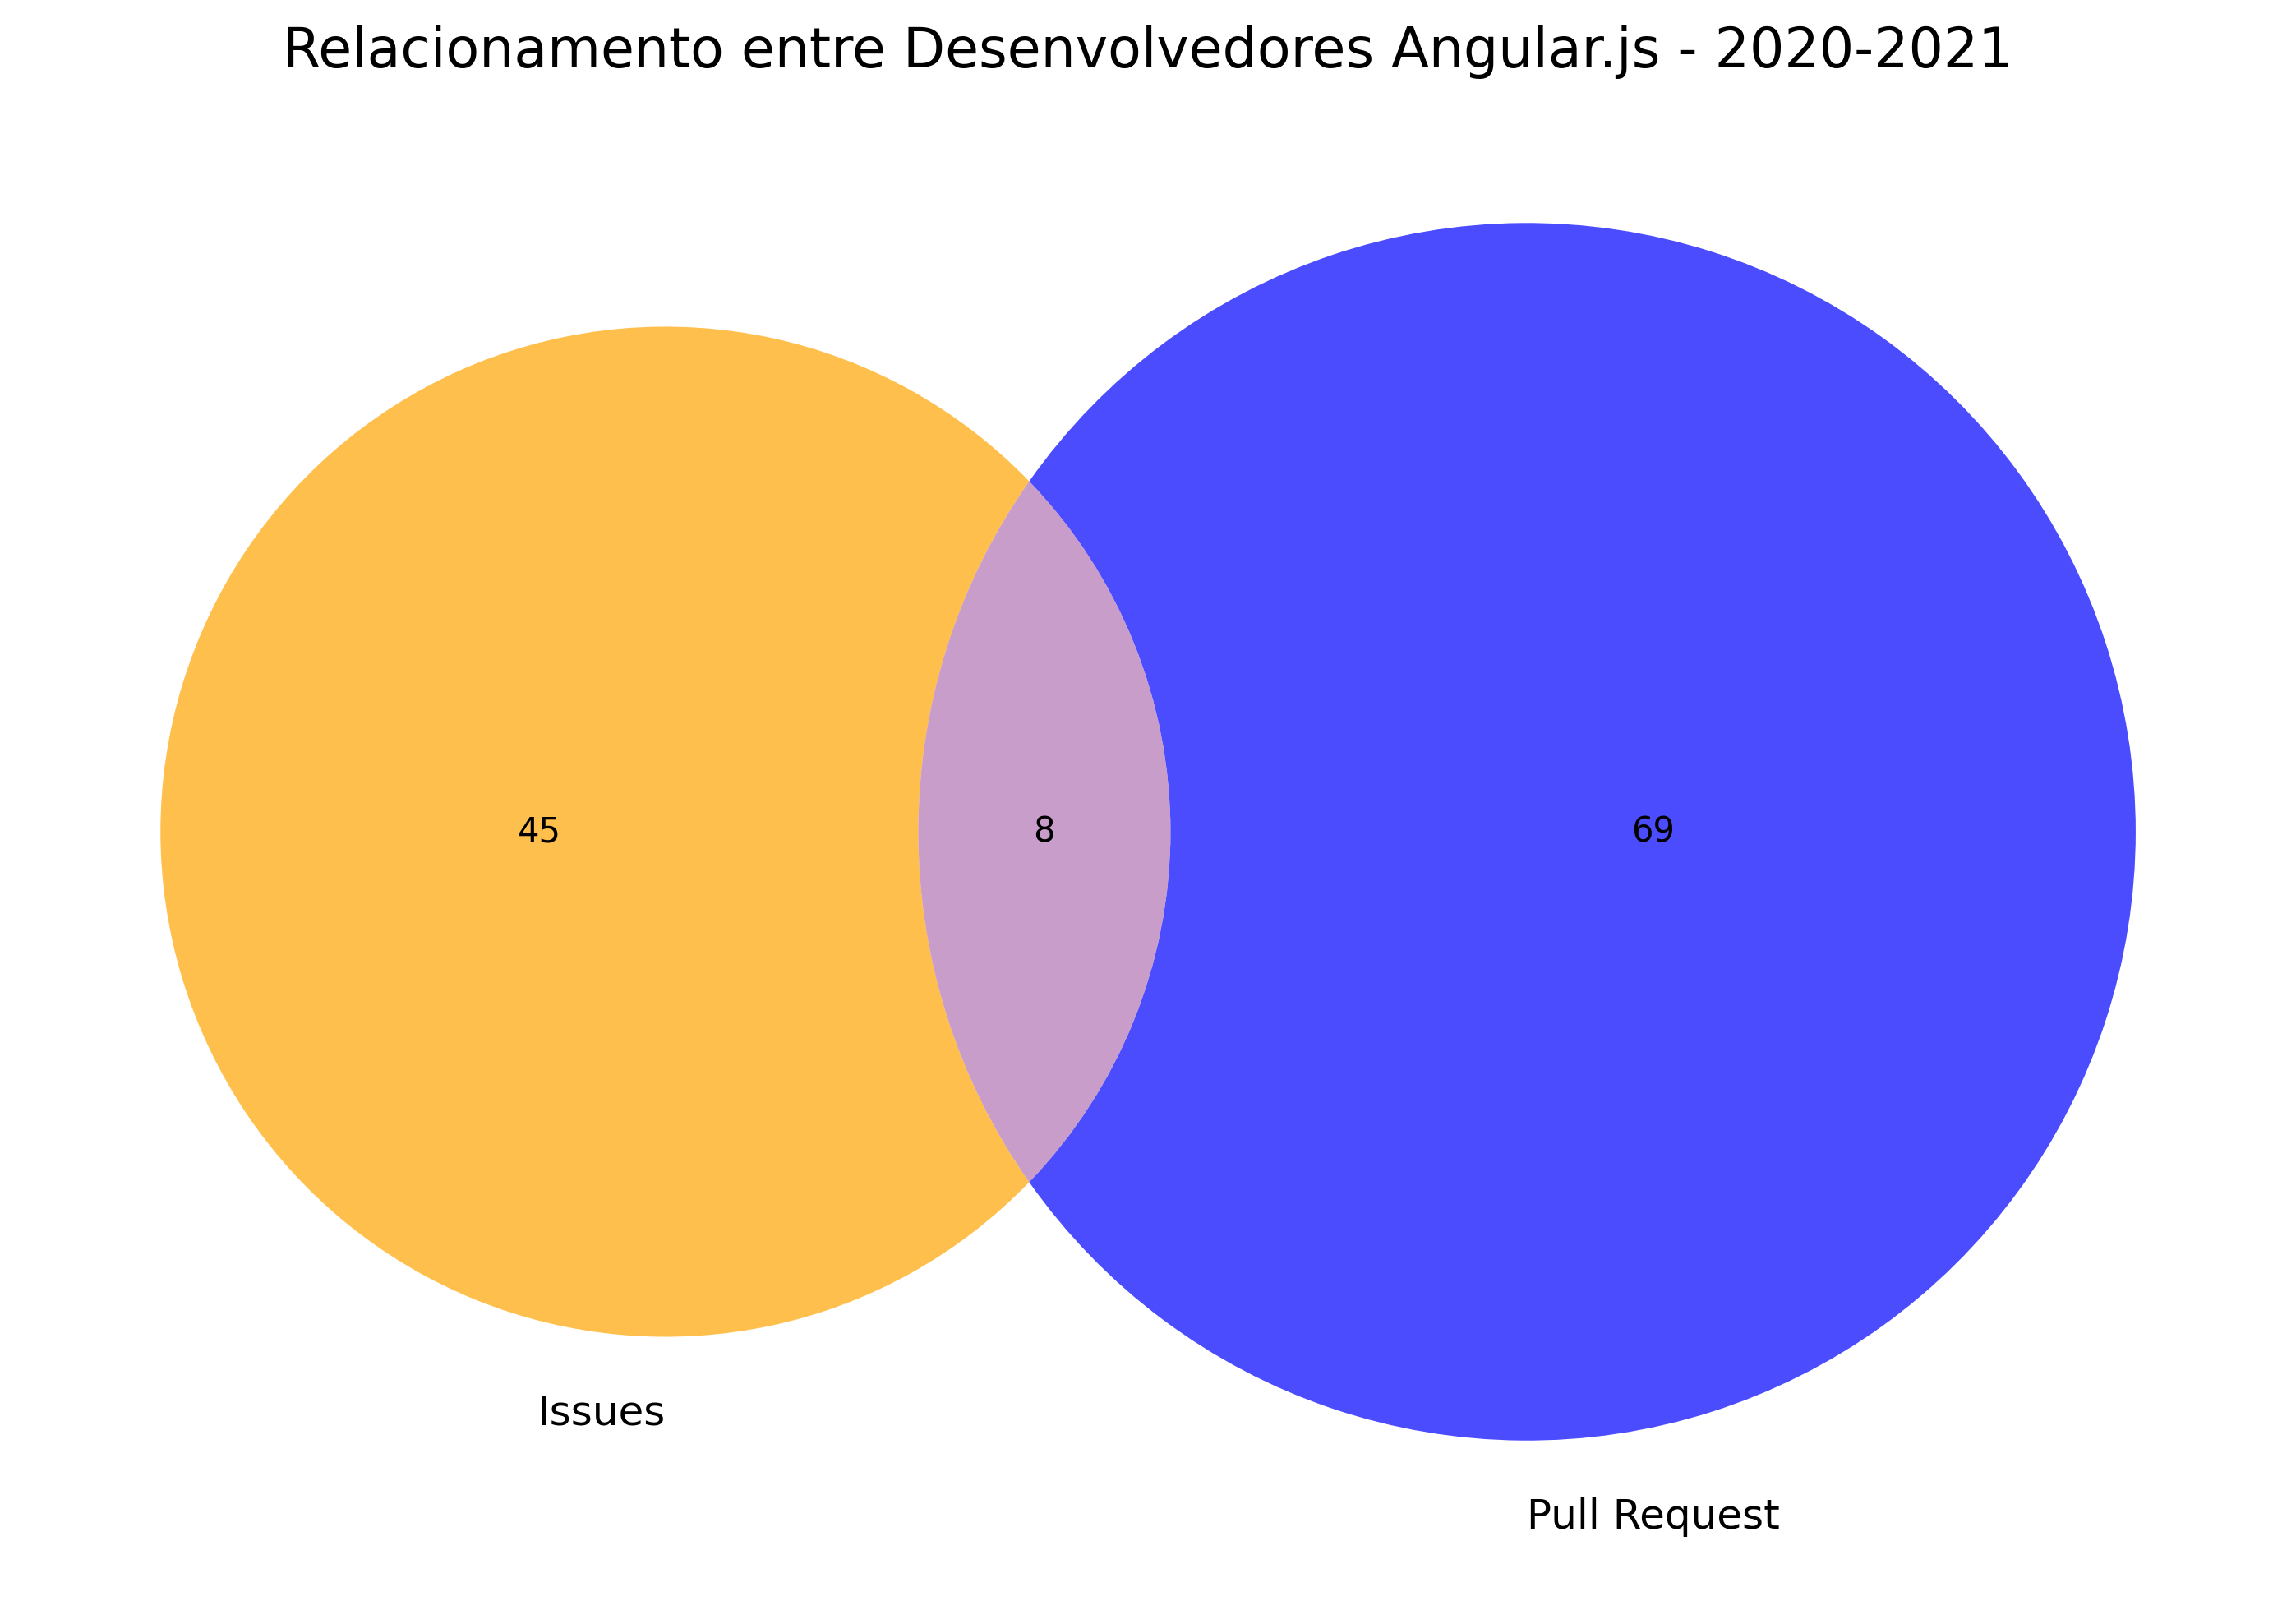

In [74]:
'''
    Diagrama de Venn
    
    Verifica qual é a distribuição dos relacionamentos construídos dentro da rede social.
        -> Quantidade de relacionamentos que são desenvolvidos apenas em issue
        -> Quantidade de relacionamentos que são desenvolvidos apenas em pull request
        -> Quantidade de relacionamentos que são desenvolvidos em ambas (issue e pull request)
'''

from matplotlib_venn import venn2 
from matplotlib import pyplot as plt

relacionamento_issues = 0
relacionamento_pull = 0
relacionamento_misto = 0

for value in lista_relacionamentos.items():
    if value[1][0] == 0 and value[1][1] > 0:
        relacionamento_pull = relacionamento_pull + 1

    elif value[1][0] > 0 and value[1][1] == 0:
        relacionamento_issues = relacionamento_issues + 1

    else:
        relacionamento_misto = relacionamento_misto + 1

figure = plt.figure(
    figsize = (12, 8), 
    facecolor = 'white',
    dpi = 300
    )

venn2(
    subsets = (
        relacionamento_issues, 
        relacionamento_pull, 
        relacionamento_misto
        ), 
    set_labels = ('Issues', 'Pull Request'),
    set_colors = ("orange", "blue"), 
    alpha = 0.7
    )

plt.title(
    'Relacionamento entre Desenvolvedores Angular.js - 2020-2021', 
    size = 16, 
    fontdict = {'color': 'black'}
    )
    
#plt.savefig('Imagens/DiagramaVenn Angular.js - 2020-2021.png')
plt.show()

In [75]:
#dataframe_consistencia_rede = list()

dataframe_consistencia_rede.append({
        'Ano': ano,
        'Ordem': total_nos,
        'Tamanho': total_arestas,
        'Grau Médio': media_incidencia,
        'Tamanho Médio': media_pesos,
    })

pd.DataFrame(dataframe_consistencia_rede).to_csv('Dados Finais/AngularJS - Metricas Rede.csv')

##### **QUESTÃO 4 [Concluída]** - Quais são os usuários mais ativos? Possuem um perfil parecido?
    
- N usuários mais ativos no repositório (Atividade de Desenvolvimento e Atividade de Interações)
- Usuários mais ativos em interações são os mais ativos no desenvolvimento? Se não lobo solitario ou velha falante

In [2]:
import pandas as pd

dataframe_comentarios = pd.read_csv('Dados Finais/AngularJS - Comentarios.csv', sep = ';')
dataframe_issues = pd.read_excel('Dados Finais/AngularJS - Issues.xlsx')
dataframe_commits = pd.read_csv('Dados Finais/AngularJS - Commits.csv', sep = ';')

In [3]:
lista_comentario = dataframe_comentarios.groupby(by = 'ID_USUARIO_COMENTARIO')['ID_ISSUE'].count()
lista_usuarios_comentario = list()

for linha in lista_comentario.items():
    id_usuario = linha[0]
    quantidade_comentarios_cadastrados = linha[1]
    
    lista_usuarios_comentario.append({
        'ID_USUARIO': id_usuario,
        'QUANTIDADE_COMENTARIOS': quantidade_comentarios_cadastrados,
    })

lista_usuarios_comentario = pd.DataFrame(lista_usuarios_comentario)

In [4]:
lista_usuarios_comentario.sort_values(by = 'QUANTIDADE_COMENTARIOS', ascending=False)

,ID_USUARIO,QUANTIDADE_COMENTARIOS
186,15655,6324
4762,1153097,5765
6950,2294695,5406
10525,8604205,5065
1499,216296,3703
...,...,...
5255,1344268,1
5254,1344105,1
5253,1344020,1
5252,1343930,1


In [5]:
lista_issue = dataframe_issues.groupby(by = 'ID_AUTOR')['Unnamed: 0'].count()
lista_usuarios_issue = list()

for linha in lista_issue.items():
    id_usuario = linha[0]
    quantidade_issues_cadastradas = linha[1]

    lista_usuarios_issue.append({
        'ID_USUARIO': id_usuario,
        'QUANTIDADE_ISSUES': quantidade_issues_cadastradas,
    })

lista_usuarios_issue = pd.DataFrame(lista_usuarios_issue)

In [6]:
lista_usuarios_issue.sort_values(by = 'QUANTIDADE_ISSUES', ascending=False)

,ID_USUARIO,QUANTIDADE_ISSUES
949,216296,396
2975,1153097,386
6842,8604205,312
106,15655,307
474,93018,300
...,...,...
3214,1300551,1
3213,1300401,1
3209,1298022,1
3208,1297510,1


In [7]:
lista_commit = dataframe_commits.groupby(by = 'ID_AUTOR')['ID_COMMIT'].count()
lista_usuarios_commit = list()

for linha in lista_commit.items():
    id_usuario = linha[0]
    quantidade_commits = linha[1]

    lista_usuarios_commit.append({
        'ID_USUARIO': id_usuario,
        'QUANTIDADE_COMMITS': quantidade_commits,
    })

lista_usuarios_commit = pd.DataFrame(lista_usuarios_commit)

In [8]:
lista_usuarios_commit.sort_values(by = 'QUANTIDADE_COMMITS', ascending = False)

,ID_USUARIO,QUANTIDADE_COMMITS
254,216296,1438
29,15655,855
159,111951,730
753,1153097,525
1427,8604205,431
...,...,...
612,829827,1
608,827049,1
606,821688,1
605,821060,1


In [9]:
lista_atividade = lista_usuarios_comentario.merge(
    lista_usuarios_issue,
    how = 'outer',
    on = 'ID_USUARIO'
).merge(
    lista_usuarios_commit,
    how = 'outer',
    on = 'ID_USUARIO'
)

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

lista_atividade = lista_atividade.replace(np.nan, 0)

scaler = MinMaxScaler()
scaler.fit(lista_atividade)
scaled = scaler.fit_transform(lista_atividade)

lista_atividade_normalizada = pd.DataFrame(scaled, columns = lista_atividade.columns)
lista_atividade_normalizada['ID_USUARIO'] = lista_atividade['ID_USUARIO']

In [11]:
lista_atividade

,ID_USUARIO,QUANTIDADE_COMENTARIOS,QUANTIDADE_ISSUES,QUANTIDADE_COMMITS
0,72,1.0,0.0,0.0
1,102,5.0,1.0,0.0
2,194,1.0,0.0,0.0
3,216,2.0,1.0,1.0
4,366,1.0,1.0,0.0
...,...,...,...,...
14477,72072883,0.0,0.0,1.0
14478,85053388,0.0,0.0,1.0
14479,93119365,0.0,0.0,1.0
14480,94489290,0.0,0.0,1.0


In [12]:
lista_atividade_normalizada.columns = ['USUARIO', 'COMENTARIOS', 'ISSUES', 'COMMITS']

In [ ]:
import math

desempenho = list()

for linha in lista_atividade_normalizada.values:
    soma = (linha[1] * linha[1]) + (linha[2] * linha[2]) + (linha[3] * linha[3])
    desempenho.append(math.sqrt(soma))

lista_atividade_normalizada['DESEMPENHO'] = desempenho

In [41]:
quartil1 = lista_atividade_normalizada.quantile(
    q = 0.25,
    axis = 0, 
    numeric_only = True, 
    interpolation = 'linear'
)

quartil2 = lista_atividade_normalizada.quantile(
    q = 0.5,
    axis = 0, 
    numeric_only = True, 
    interpolation = 'linear'
)

quartil3 = lista_atividade_normalizada.quantile(
    q = 0.75,
    axis = 0, 
    numeric_only = True, 
    interpolation = 'linear'
)

In [48]:
quartil_comentario = list()
quartil_commits = list()
quartil_issues = list()

for linha in lista_atividade_normalizada.values:
    
    comentario = linha[1]
    if comentario <= quartil1[1]:
        quartil_comentario.append('1')
    elif comentario <= quartil2[1]:
        quartil_comentario.append('2')
    elif comentario <= quartil3[1]:
        quartil_comentario.append('3')
    else:
        quartil_comentario.append('4')
        

    issues = linha[2]
    if issues <= quartil1[2]:
        quartil_issues.append('1')
    elif issues <= quartil2[2]:
        quartil_issues.append('2')
    elif issues <= quartil3[2]:
        quartil_issues.append('3')
    else:
        quartil_issues.append('4')


    commits = linha[3]
    if commits <= quartil1[3]:
        quartil_commits.append('1')
    elif commits <= quartil2[3]:
        quartil_commits.append('2')
    elif commits <= quartil3[3]:
        quartil_commits.append('3')
    else:
        quartil_commits.append('4')

lista_atividade_normalizada['QUARTIL COMENTARIO'] = quartil_comentario
lista_atividade_normalizada['QUARTIL ISSUE'] = quartil_issues
lista_atividade_normalizada['QUARTIL COMMITS'] = quartil_commits

In [61]:
lista_atividade_normalizada.sort_values(by = 'DESEMPENHO', ascending = False).to_csv('Dados Finais/AngularJS - Metricas Usuarios.csv', sep = ';')

In [57]:
import plotly.express as px

fig = px.scatter_3d(
    lista_atividade_normalizada, 
    x ='COMENTARIOS', 
    y ='ISSUES', 
    z ='COMMITS',
    opacity = 1
    )

# tight layout
fig.update_layout(margin = dict(l=0, r=0, b=0, t=0))

##### **QUESTÃO 5** - Há usuários que não interagem mas que desenvolvem muito? (Lobos solitários)

- Diagrama de Pareto - Desenvolvedores que menos interagem são os que entregam mais resultados?

##### **QUESTÃO 6** - Problemas sociais se refletem dentro do repositório?

##### **QUESTÃO 7** - Qual o movimento de migração de desenvolvedores, caso abandonem o projeto?